# Delta Hedging Stochastic Paths

Import the packages, functions, and parameters we need for this question.

In [37]:
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

In [38]:
# Adapted from Octave's financial toolkit
from scipy.stats import norm
import numpy as np
    
def blsprice(Price, Strike, Rate, Time, Volatility):
    sigma_sqrtT = Volatility * np.sqrt (Time)

    d1 = 1 / sigma_sqrtT * (np.log(Price / Strike) + (Rate + Volatility**2 / 2) * Time)
    d2 = d1 - sigma_sqrtT

    phi1 = norm.cdf(d1)
    phi2 = norm.cdf(d2)
    disc = np.exp (-Rate * Time)
    F    = Price * np.exp ((Rate) * Time)

    Call = disc * (F * phi1 - Strike * phi2)
    Put  = disc * (Strike * (1 - phi2) + F * (phi1 - 1))
    return Call, Put

In [39]:
# Adapted from Octave's financial toolkit
from scipy.stats import norm
import numpy as np
    
def blsdelta(Price, Strike, Rate, Time, Volatility):
    d1 = 1 / (Volatility * np.sqrt(Time)) * (np.log (Price / Strike) + (Rate + Volatility**2 / 2) * Time)

    phi = norm.cdf(d1)

    CallDelta = phi
    PutDelta = phi - 1
    return CallDelta, PutDelta

In [40]:
sigma = 0.16    # Volatility
r = 0.06        # Risk-free rate
T = 2           # Time to expiry
K = 100         # Strike price
S0 = 100        # Initial asset price
mu = 0.08       # Real world drift rate

Write the delta hedging (single stochastic paths) function for puts with no early exercise, that is, European puts.

In [41]:
def DHSSP_EP(N):
    # N is the number of hedging rebalances
    delt = T/N

    # Initial values
    t = [0]
    S = [S0]
    V = [blsprice(S0, K, r, T, sigma)[1]]
    alpha = [blsdelta(S0, K, r, T, sigma)[1]]
    B = [V[0] - alpha[0]*S[0]]
    Pi = [-V[0] + alpha[0]*S[0] + B[0]]
    alphaS = [alpha[0]*S[0]]

    i = 1
    while i <= N:
        ti = t[i-1] + delt
        t.append(ti)

        phi = np.random.normal(0, 1)
        # Stock price
        Si = S[i-1]*math.exp((mu-sigma**2/2)*(ti - t[i-1]) + sigma*phi*math.sqrt(ti - t[i-1]))
        S.append(Si)

        Vi = blsprice(Si, K, r, T - (i-1)*delt, sigma)[1]
        V.append(Vi)

        alphai = blsdelta(Si, K, r, T - (i-1)*delt, sigma)[1]
        alpha.append(alphai)

        # Value in the risk-free account
        Bi = B[i-1]*math.exp(r*delt) - Si*(alphai - alpha[i-1])
        B.append(Bi)

        # Stock holding
        alphaiSi = alphai*Si
        alphaS.append(alphaiSi)

        # Total portfolio value
        Pii = -Vi + alphai*Si + Bi
        Pi.append(Pii)

        i = i + 1
        
    plt.rcParams['figure.figsize'] = [6, 4]
    plt.plot(t, S, label = "Stock price, S_i")
    plt.plot(t, B, label = "Value in the risk-free account, $B_i$")
    plt.plot(t,alphaS, label = "Stock holding, $\\alpha_i S_i$")
    plt.plot(t, Pi, label = "Total portfolio value, $\\Pi_i$")
    plt.title("Delta Hedging: Single Stochastic Paths, %d Rebalances"%(N), fontsize = 12)
    plt.xlabel("Expiry Time", fontsize = 12)
    plt.ylabel("$S_i$, $B_i$, $\\alpha_i S_i$, $\\Pi_i$", fontsize = 12)
    plt.legend(prop = {"size": 7})
    plt.show()

    Absolute_Relative_Hedge_Error = abs(math.exp(-r*T)*Pi[N]/abs(V[0]))

    return Absolute_Relative_Hedge_Error

Generate the four different plots, using $10$, $100$, $1000$, $10000$ timesteps$/$intervals in $[0,T]$ and an additional plot of number of rebalances vs. the corresponding *absolute value* of the relative hedge error.

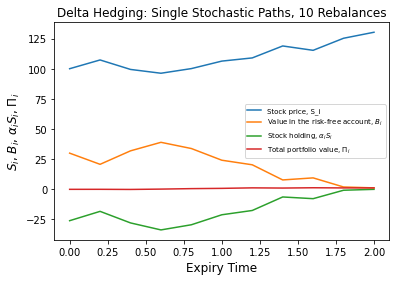

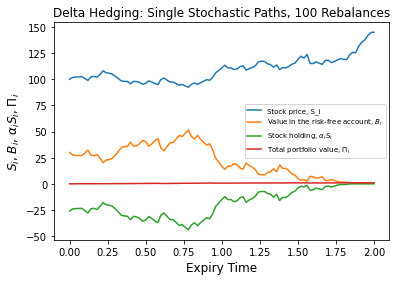

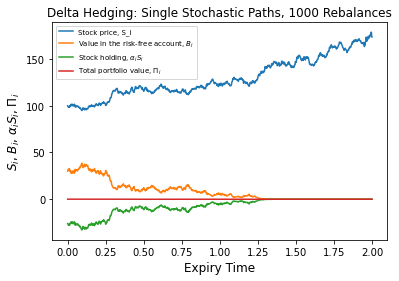

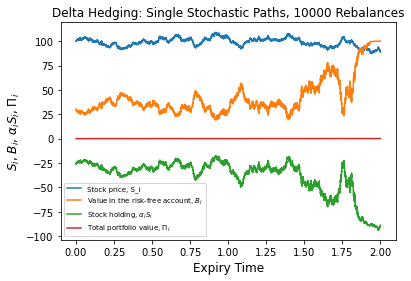

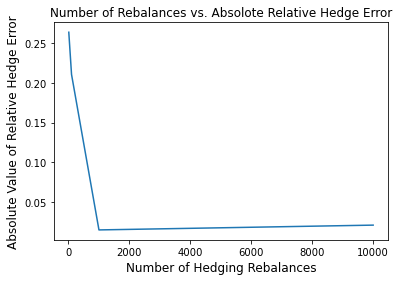

In [42]:
# Number of hedging rebalances
N1 = 10
N2 = 100
N3 = 1000
N4 = 10000
N = [N1, N2, N3, N4]

# 4 plots with corresponding rebalances
abs_RHE = [DHSSP_EP(N1), DHSSP_EP(N2), DHSSP_EP(N3), DHSSP_EP(N4)]

# Additional plot of rebalance counts vs. error
plt.rcParams['figure.figsize'] = [6, 4]
plt.plot(N, abs_RHE)
plt.title("Number of Rebalances vs. Absolote Relative Hedge Error", fontsize = 12)
plt.xlabel("Number of Hedging Rebalances", fontsize = 12)
plt.ylabel("Absolute Value of Relative Hedge Error", fontsize = 12)
plt.show()

Observation:

> The red line of total portfolio value $(\Pi_i)$ fluctuates slightly around $0$, that is, approximately equals to $0$.

> The orange line of value in the risk-free account $(B_i)$ and the green line of stock holding $(\alpha_i S_i)$ are symmetric with respect to the red line of total portfolio value $(\Pi_i)$, that is, are approximately opposite with respect to $0$.

> As the number of hedging rebalances gets larger, the absolute value of the relative hedge error gets closer to $0$.